Для анализа временного ряда можно использовать метод экспоненциального сглаживания (exponential smoothing). Этот метод особенно полезен для предсказания будущих значений на основе предыдущих наблюдений.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
from statsmodels.tools.sm_exceptions import ValueWarning
warnings.filterwarnings('ignore', category=ValueWarning)

In [2]:
# Загрузка данных
data = pd.read_csv('./ДРВ.csv')

# Преобразование столбца 'Дата' в формат datetime
data['Дата'] = pd.to_datetime(data['Дата'], format='%d.%m.%Y')

# Установка столбца 'Дата' в качестве индекса
data.set_index('Дата', inplace=True)

# Отсортируем данные по индексу (по дате)
data.sort_index(inplace=True)

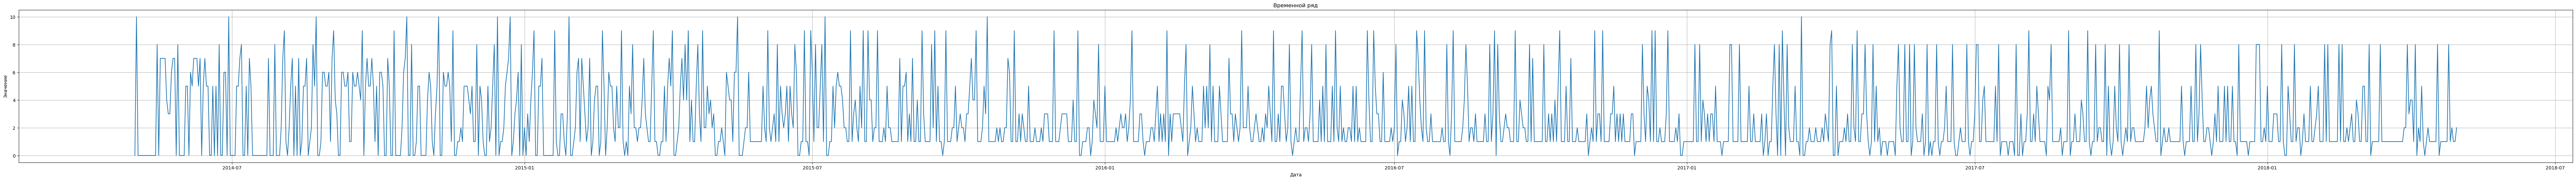

In [3]:
# Визуализация временного ряда
plt.figure(figsize=(100, 6))
plt.plot(data.index, data['Значение'])
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('Временной ряд')
plt.grid(True)
plt.show()

Далее применяем экспоненциальное сглаживание с помощью модели Хольта-Винтерса (Holt-Winters) для прогнозирования будущих значений и анализа тренда и сезонности в данных:

In [4]:
# Применение экспоненциального сглаживания
model = ExponentialSmoothing(data['Значение'], trend='add', seasonal='add', seasonal_periods=12)
result = model.fit()

In [5]:
# Прогнозирование будущих значений
forecast = result.predict(start='2018-05-01', end='2019-05-01')

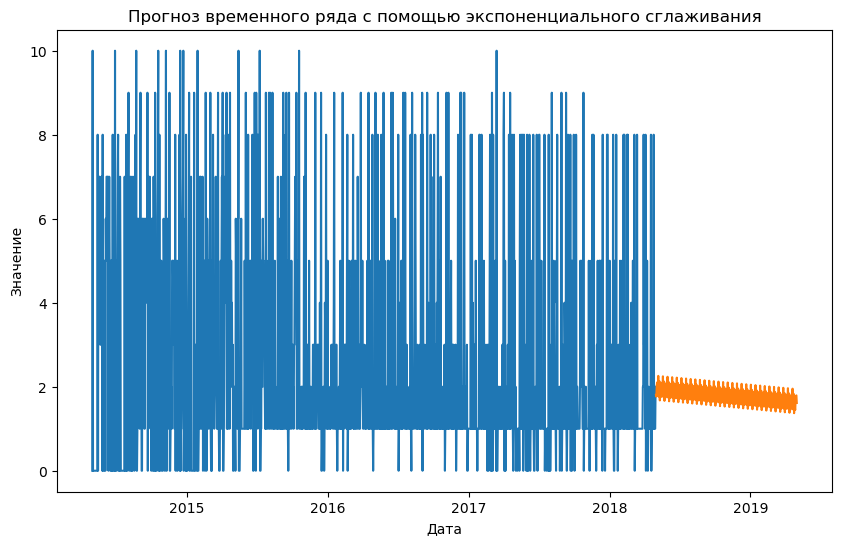

In [6]:
# Построение графика с прогнозом
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Значение'], label='Исходные данные')
plt.plot(forecast.index, forecast, label='Прогноз')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('Прогноз временного ряда с помощью экспоненциального сглаживания')
plt.show()

## Выводы:
1. Наблюдается периодический спад и подъем по несколько раз в неделю. 
2. В целом наблюдается тренд снижения значений на протяжение всего анализируемого периода. 
3. Выбросы не наблюдаются, значения находятся в диапазоне от 0 до 10. 
4. Прогноз на следующий год показывает, что тренд продолжит свое снижение.